In [109]:
# common standard libraries
import datetime
import time
import os
# common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit learn
import requests
from bs4 import BeautifulSoup
# visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# MERGING DATA SET

In [110]:
pd.merge?

In [111]:

# Build a simple set of tables

df_1 = pd.DataFrame({'product': ['red shirt', 'red shirt', 'red shirt', 'white dress'],
                     'price': [49.33, 49.33, 32.49, 199.99]})
df_2 = pd.DataFrame({'product': ['red shirt', 'blue pants', 'white tuxedo', 'white dress'],
                     'in_stock': [True, True, False, False]})
df_2

,product,in_stock
0,red shirt,True
1,blue pants,True
2,white tuxedo,False
3,white dress,False


In [114]:
# Inner merge

df = pd.merge(left=df_1, right=df_2, on='product', how='inner')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [115]:
# Outer merge

df = pd.merge(left=df_1, right=df_2, on='product', how='outer')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [116]:
df.drop_duplicates()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [117]:
df.drop_duplicates(inplace=True)
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [118]:
df2 = df

# handling missing values
missing data could represented by ?, 9999 or 0

In [97]:
# Convert '?' to NaN
# df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

product     0
price       2
in_stock    0
dtype: int64
Shape of Original DataFrame: (5, 3)
Shape of DataFrame After Dropping All Rows with Missing Values: (3, 3)


In [61]:
print(df.isnull().sum())

price                   0.0
in_stock                0.0
rating                  0.0
product_blue pants      0.0
product_red shirt       0.0
product_white dress     0.0
product_white tuxedo    0.0
dtype: float64


In [83]:
# step by step method for imputing 
# preparing a small data set for practising

df_2 = pd.DataFrame({'product': ['red shirt', 'blue pants', 'white tuxedo', 'white dress'],
                     'in_stock': [True, True, False, False], 'age': [3, 4, '?', 6]})
df_2[df_2 == '?'] = np.nan
df_2

,product,in_stock,age
0,red shirt,True,3
1,blue pants,True,4
2,white tuxedo,False,NaN
3,white dress,False,6


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Imputing missing data in a ML Pipeline

steps to building a model
1- from creating training and test sets
2- to fitting a classifier or regressor
3- to tuning its parameters
4-to evaluating its performance on new data.

Imputation can be seen as the first step of this machine learning process which can be views as a pipeline

 Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.
 

In [98]:
# Import the Imputer module
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')  # 0 = columns, 1= rows

# Instantiate the SVC classifier: clf
# other classidfiers could be k-NN, logistic regression, and the decision tree
clf = SVC()

# Setup the pipeline with the required steps: steps .The two tuples needed are ('imputation', imp), and ('SVM', clf)
steps = [('imputation', imp),
        ('SVM', clf)]


In [ ]:
# this pipeline is for imputation as well as classification

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='most_frequent')),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


# Drop the incomplete rows

df.dropna()
# Drop the incomplete colums

df.dropna(axis = 1)


# Fill with the average

df.fillna(value=df.price.mean())

# Fill with the previous value in that column

df.fillna(method='pad')

In [21]:
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [108]:

df = df.fillna(value=df.price.mean())
ratings = ['low', 'medium', 'high'] # adding ratings columns
np.random.seed(2)
df['rating'] = np.random.choice(ratings, len(df))
df

,product,price,in_stock,rating
0,red shirt,49.33,True,low
2,red shirt,32.49,True,medium
3,white dress,199.99,False,low


# Convert variable to binary(0/1)

In [43]:
# Convert in_stock to binary

df.in_stock = df.in_stock.map({False: 0, True: 1})
df

,product,price,in_stock,rating
0,red shirt,49.330000,NaN,low
2,red shirt,32.490000,NaN,medium
3,white dress,199.990000,NaN,low
4,blue pants,93.936667,NaN,high
5,white tuxedo,93.936667,NaN,high


# Encode ordinal labels

In [100]:
# Encode ordinal labels

from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()
df.rating = rating_encoder.fit_transform(df.rating)
df

,product,price,in_stock,rating
0,red shirt,49.33,True,0
2,red shirt,32.49,True,1
3,white dress,199.99,False,0


<AxesSubplot:title={'center':'price'}, xlabel='product'>

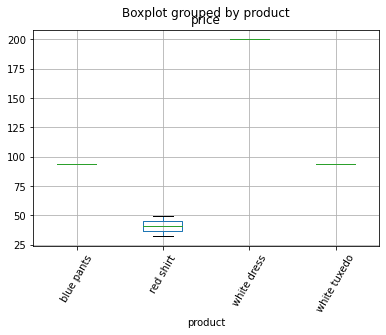

In [51]:
# Create a boxplot of price per product
df.boxplot('price', 'product', rot = 60)

In [25]:
# Convert back if needed

rating_encoder.inverse_transform(df.rating)

array(['low', 'medium', 'low', 'high', 'high'], dtype=object)


# One-hot-encode the product feature

this binarize categorical variables by creating dummy variables which are numerical as sckit learn will onlyt accepts numerical variables

In [105]:
df

,product,price,in_stock,rating
0,red shirt,49.33,True,0
2,red shirt,32.49,True,1
3,white dress,199.99,False,0


In [106]:

# One-hot-encode the product feature

# Create dummy variables: df_product
df_product = pd.get_dummies(df)
df_product

# Print the columns of df_region
#print(df_product.columns)



,price,in_stock,rating,product_red shirt,product_white dress
0,49.33,True,0,1,0
2,32.49,True,1,1,0
3,199.99,False,0,0,1


# using the df2 data etr to practise one hot encoding as well

In [120]:
# In scikit-learn, the DictVectorizer class can be used to one-hot encode categorical features:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [
{'city': 'New York'},
{'city': 'San Francisco'},
{'city': 'Chapel Hill'}]

In [122]:
print(onehot_encoder.fit_transform(instances).toarray())

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [107]:
# use drop_first=True to drop the unneeded dummy variable
df_product = pd.get_dummies(df, drop_first=True)
df_product

#NB. always use this option to drop unnecessary columns and this is now ready for any regression going forward

,price,in_stock,rating,product_white dress
0,49.33,True,0,0
2,32.49,True,1,0
3,199.99,False,0,1


# Centering and Scaling data
 features that are on far largher scale that others can influece the performance of ML models
 we scale the data to ensure features are on comparable scale
 
 ways to normalise
 1- standardise by subtracting the mean and devide by variance son that all features  have a mean of zero and variance of 1
 or
     subtract the min and divide by the range of the data so the nrmalise data has min 0 and max of 1

from sklearn.preprocessing import scale
scaled_x = scale(x)
check the mean and sd of scaled data
np.mean(scaled_x)
np.std(scaled_x)

 Import scale
from sklearn.preprocessing import scale

Scale the features: X_scaled
X_scaled = scale(X)

Print the mean and standard deviation of the unscaled features

print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

Print the mean and standard deviation of the scaled features

print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))


# scaling in a pipeline

In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


# pipeline for classification

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


# pipeline for regression

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


# Split into training and testing sets


In [27]:
# Split into training and testing sets

features = ['price', 'rating', 'product_blue pants',
            'product_red shirt', 'product_white dress',
            'product_white tuxedo']
X = df[features].values

target = 'in_stock'
y = df[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # test set has 30% of the sample
    

In [28]:
print('         shape')
print('--------------')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', y_train.shape)
print('y_test ', y_test.shape)

         shape
--------------
X_train (3, 6)
X_test  (2, 6)
y_train (3,)
y_test  (2,)


# Normalization and standardization

Normalizing or standardizing are similar techniques that change the range of values that a feature has. Doing so helps models learn faster and more robustly

Standardization means to scale values so that they all fit within a certain range – typically 0 – 1.


Normalization is similar but instead, we subtract the mean, also known as the average, of the values, and then divide by the standard deviation. after normalization, our mean value is zero, and about 95% of values fall between -2 and 2




# Normalizing data

In [ ]:
# Add the normalized verions of "age_when_trained" to the dataset.
# Notice that it "centers" the mean age around 0
data["normalized_age_when_trained"] = (data.month_old_when_trained - numpy.mean(data.month_old_when_trained)) / (numpy.std(data.month_old_when_trained))

In [ ]:
# box plots cahn be used to comparde the normalized and non normalised features

# This plots clearly shows that using a normalized dataset allowed our model to converge much faster. 
# Reaching the lowest cost and finding the optimal weights required a much smaller number of iterations.

# This is very important when you are developing a new model, as it allows you to iterate quicker, 
# but also when your model is deployed to a production environment, as it will require less compute time 
# for training and costing less than a "slow" model

# overfitting

A model has been overfit if it works better on the training data than it does on other data.


# Test sets can be misleading

Although test sets are helpful to identify overtraining, they can provide us with false confidence for the following reasons
1-test set are usualky small and it will not be representative of the variety of data that are likely to be seen in the real world. 

2- If test set comes from biased source, our metrics will not reflect how things will behave in the real world.

# Train and test isn't the only approach

Two common alternatives are the
1- hold-out approach, 
2 -and statistical methods

# The hold-out approach
The hold-out approach is like train-and-test, but instead of splitting a dataset into two, it's split into three: training, test—also known as validation—and hold-out.

The training and test datasets are as we’ve described above. The hold-out dataset is a kind of test set that is used only once, when we're ready to deploy our model for real-world use. 


This approach tackles the fact that we usually experiment with different models and training regimens. For example, we fit a model, find it doesn't work well with the test dataset, change some aspects of the model being trained, and try again until we can get a good result. 

This means we're purposefully altering our model to work for a particular set of data, just like normal training does with the training dataset. By doing this, we can end up with a model that is essentially too overtrained to work on our test dataset!



# Statistical approaches
Simpler models that have originated in statistics often don't need test datasets. Instead, what degree the model is overfit can be calculated directly as statistical significance: a ‘p-value’.


These statistical methods are powerful, well established, and form the foundation of modern science. The advantage is that the training set doesn't ever need to be split and we get a much more precise understanding of how confident we can be about a model. For example, a p-value of 0.01 mean there's a very small chance that our model has found a relationship that doesn't actually exist in the real world. By contrast, a p-value of 0.5 means that while our model might look good with our training data, it will be no better than flipping a coin in the real-world.



# Data set split ratio comparison

In [123]:
from sklearn.model_selection import train_test_split

# Split Dataset using different ratios 50:50, 60:40, 70:30, 80:20
train_5050, test_5050 = train_test_split(dataset, test_size=0.5, random_state=2)
train_6040, test_6040 = train_test_split(dataset, test_size=0.4, random_state=2)
train_7030, test_7030 = train_test_split(dataset, test_size=0.3, random_state=2)
train_8020, test_8020 = train_test_split(dataset, test_size=0.2, random_state=2)

# Add a column to each set to identify if a datapoint belongs to "train" or "test"
train_5050, test_5050 = train_5050.assign(Set="train"), test_5050.assign(Set="test")
train_6040, test_6040 = train_6040.assign(Set="train"), test_6040.assign(Set="test")
train_7030, test_7030 = train_7030.assign(Set="train"), test_7030.assign(Set="test")
train_8020, test_8020 = train_8020.assign(Set="train"), test_8020.assign(Set="test")

# Concatenate the "train" and "test" sets for each split so we can plot them on the same chart
df_5050 = pandas.concat([train_5050, test_5050], axis=0)
df_6040 = pandas.concat([train_6040, test_6040], axis=0)
df_7030 = pandas.concat([train_7030, test_7030], axis=0)
df_8020 = pandas.concat([train_8020, test_8020], axis=0)

NameError: name 'dataset' is not defined

# Let's take a look at the distributions of training data for each split

In [ ]:
# Add a column for each "train" set that identifies the split used
train_8020 = train_8020.assign(Split="80:20")
train_7030 = train_7030.assign(Split="70:30")
train_6040 = train_6040.assign(Split="60:40")
train_5050 = train_5050.assign(Split="50:50")

# Concatenate training sets so we can plot them on the same chart
split_df = pandas.concat([train_5050, train_6040, train_7030, train_8020], axis=0)

 # Plot a histogram of data distribution
graphing.multiple_histogram(split_df, label_x="rescues_last_year", label_group="Split", title="Distribution of Training data")

# Fitting and evaluating models with different split ratios

In [ ]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

def train_and_test_model(name, train, test):
    '''
    This method creates a model, trains it on the provided data, and assesses 
    it against the test data
    '''
    # This formula says that rescues_last_year is explained by weight_last_year
    formula = "rescues_last_year ~ weight_last_year"

    # Create and train a linear regression model using the training data
    model = smf.ols(formula = formula, data = train).fit()

    # Now evaluate the model (by calculating the Mean Squared Error) using the 
    # corresponding "test" set for that split
    correct_answers = test['rescues_last_year']
    predictions = model.predict(test['weight_last_year'])
    MSE = mse(correct_answers, predictions)
    print(name + ' MSE = %f ' % MSE)

    return model


# Train a model and test it for each kind of split
print("Mean Squared Error values (smaller is better)")
model_5050 = train_and_test_model("50:50", train_5050, test_5050)
model_6040 = train_and_test_model("60:40", train_6040, test_6040)
model_7030 = train_and_test_model("70:30", train_7030, test_7030)
model_8020 = train_and_test_model("80:20", train_8020, test_8020)